In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df_audio_features = pd.read_csv('final_audio_features_dataset.csv')
df_audio_features

,Track_ID,Track_Name,Artist,Release_Date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Popularity_Score
0,4xdBrk0nFZaP54vvZj0yx7,HOT TO GO!,Chappell Roan,2023-09-22,0.742,0.757,-4.981,0.0421,0.0187,0.000000,0.3050,0.957,139.982,184841,90
1,1k2pQc5i348DCHwbn5KTdc,Pink Pony Club,Chappell Roan,2023-09-22,0.610,0.650,-6.199,0.0474,0.3990,0.000000,0.1100,0.507,106.719,258035,87
2,7FOgcfdz9Nx5V9lCNXdBYv,Red Wine Supernova,Chappell Roan,2023-09-22,0.657,0.820,-4.448,0.0441,0.0176,0.000000,0.0847,0.709,124.041,192721,86
3,3WSOUb3U7tqURbBSgZTrZX,Casual,Chappell Roan,2023-09-22,0.508,0.411,-6.950,0.0269,0.2260,0.000000,0.0571,0.340,131.008,232796,85
4,2Zo1PcszsT9WQ0ANntJbID,Feather,Sabrina Carpenter,2023-03-17,0.791,0.694,-4.332,0.0335,0.0736,0.000002,0.0958,0.826,123.508,185553,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20391,4ZewQ8harT19Pq9mmxwB5J,The Battle,Gavin Adcock,2024-08-02,0.611,0.293,-6.786,0.0367,0.4800,0.000000,0.1010,0.368,157.178,289533,43
20392,0s46KBPPyQmRPWq0ajsVIc,Halfway To Heaven,Midland,2024-09-20,0.512,0.786,-5.614,0.0271,0.0982,0.000000,0.1360,0.435,88.442,290707,44
20393,2iHZtUsHdaysPlXuWWkadb,One That You Want,Troy Cartwright,2024-08-02,0.544,0.842,-4.953,0.0328,0.0119,0.000000,0.3050,0.323,120.083,178276,44
20394,6FEV8FeTA9kKU2sLTSJw7V,Vegas,Shaboozey,2024-03-15,0.564,0.525,-7.449,0.0259,0.3380,0.000812,0.1210,0.228,141.977,180400,47


In [48]:
# Check the data types of each column
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20396 entries, 0 to 20395
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track_ID          20396 non-null  object 
 1   Track_Name        20396 non-null  object 
 2   Artist            20396 non-null  object 
 3   Release_Date      20396 non-null  object 
 4   danceability      20396 non-null  float64
 5   energy            20396 non-null  float64
 6   loudness          20396 non-null  float64
 7   speechiness       20396 non-null  float64
 8   acousticness      20396 non-null  float64
 9   instrumentalness  20396 non-null  float64
 10  liveness          20396 non-null  float64
 11  valence           20396 non-null  float64
 12  tempo             20396 non-null  float64
 13  duration_ms       20396 non-null  int64  
 14  Popularity_Score  20396 non-null  int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 2.3+ MB


# DATA CLEANING

In [51]:
print(f" DataFrame shape before cleaning: {df_audio_features.shape}\n")

# Check for missing values
print(f" Missing Values:\n{df_audio_features.isnull().sum()}")
#Fill missing values with mean or median
df_audio_features = df_audio_features.fillna(df_audio_features.mean())


# Check for duplicate rows
duplicates = df_audio_features.duplicated().sum()

if duplicates:
    df_audio_features = df_audio_features.drop_duplicates()

# Display the count of duplicates and the new shape of the DataFrame
print(f"\n\nNumber of duplicate rows: {duplicates}")
print(f"DataFrame shape after cleaning: {df_audio_features.shape}")

 DataFrame shape before cleaning: (20396, 15)

 Missing Values:
Track_ID            0
Track_Name          0
Artist              0
Release_Date        0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
Popularity_Score    0
dtype: int64


Number of duplicate rows: 3665
DataFrame shape after cleaning: (16731, 15)


C:\Users\manis\AppData\Local\Temp\ipykernel_16268\3807664422.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_audio_features = df_audio_features.fillna(df_audio_features.mean())


Original Data Shape: (16731, 15)
Data Shape After Removing Outliers: (11427, 15)


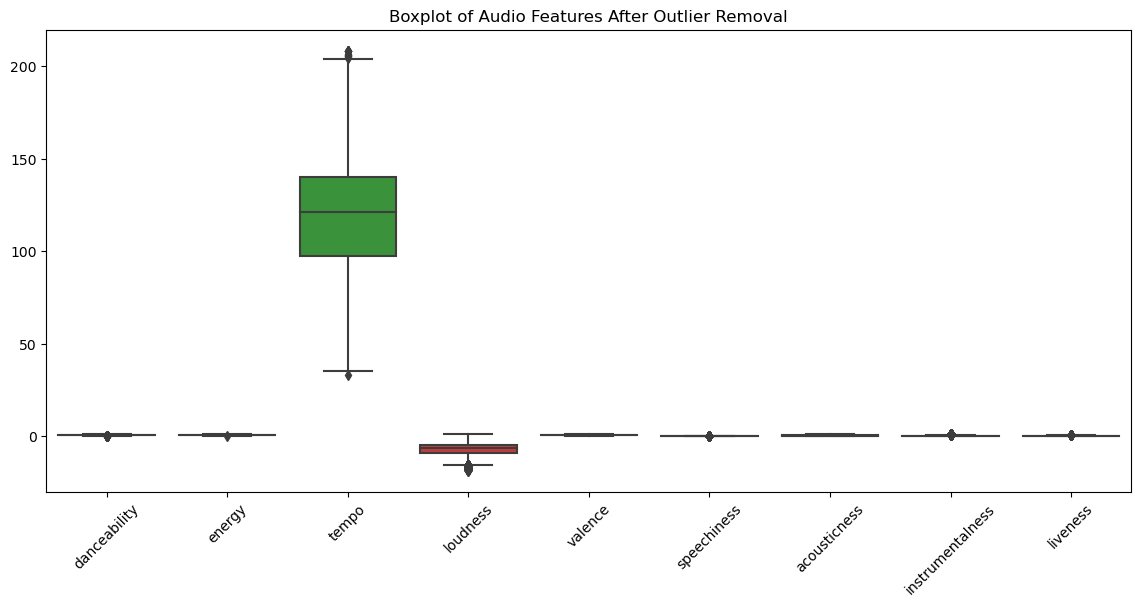

In [52]:

# List of audio feature columns (numerical only)
audio_features = ['danceability', 'energy', 'tempo', 'loudness', 
                  'valence', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness']

# Calculate IQR
Q1 = df_audio_features[audio_features].quantile(0.25)  # 25th percentile
Q3 = df_audio_features[audio_features].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Filter rows without outliers
df_no_outliers = df_audio_features[~(
    (df_audio_features[audio_features] < (Q1 - 1.5 * IQR)) |
    (df_audio_features[audio_features] > (Q3 + 1.5 * IQR))
).any(axis=1)]

print(f"Original Data Shape: {df_audio_features.shape}")
print(f"Data Shape After Removing Outliers: {df_no_outliers.shape}")

# Visualize the data with boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_no_outliers[audio_features])
plt.title('Boxplot of Audio Features After Outlier Removal')
plt.xticks(rotation=45)
plt.show()


# DESCRIPTIVE ANALYSIS

In [63]:
print("Descriptive Statistics:\n")
descriptive_stats = df_no_outliers.describe()
descriptive_stats

Descriptive Statistics:



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Popularity_Score
count,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,1.142700e+04,11427.000000
mean,0.607254,0.629288,-7.460733,0.057202,0.274330,0.183514,0.146396,0.469798,121.122676,2.084279e+05,44.093025
std,0.151867,0.217467,3.621423,0.032242,0.305782,0.327895,0.077206,0.239366,29.160763,7.129333e+04,16.234023
min,0.091800,0.015800,-18.669000,0.022400,0.000000,0.000000,0.017300,0.024700,33.036000,1.748900e+04,0.000000
25%,0.506000,0.488000,-9.150500,0.034600,0.023500,0.000000,0.096400,0.281000,97.465500,1.683870e+05,33.000000
50%,0.615000,0.664000,-6.522000,0.045600,0.134000,0.000110,0.117000,0.458000,121.004000,1.980000e+05,44.000000
75%,0.723000,0.802000,-4.896000,0.067650,0.470000,0.157000,0.174000,0.656000,140.124500,2.329260e+05,55.000000
max,0.976000,0.998000,1.269000,0.172000,0.995000,0.985000,0.367000,0.977000,208.411000,1.224318e+06,100.000000


In [60]:
# Summary Statistics for Audio Features
audio_features = ['danceability', 'energy', 'tempo', 'loudness', 
                  'valence', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness']

print("\nAudio Feature Statistics:\n")
audio_feature_stats = df_no_outliers[audio_features].describe()
audio_feature_stats


Audio Feature Statistics:



,danceability,energy,tempo,loudness,valence,speechiness,acousticness,instrumentalness,liveness
count,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000,11427.000000
mean,0.607254,0.629288,121.122676,-7.460733,0.469798,0.057202,0.274330,0.183514,0.146396
std,0.151867,0.217467,29.160763,3.621423,0.239366,0.032242,0.305782,0.327895,0.077206
min,0.091800,0.015800,33.036000,-18.669000,0.024700,0.022400,0.000000,0.000000,0.017300
25%,0.506000,0.488000,97.465500,-9.150500,0.281000,0.034600,0.023500,0.000000,0.096400
50%,0.615000,0.664000,121.004000,-6.522000,0.458000,0.045600,0.134000,0.000110,0.117000
75%,0.723000,0.802000,140.124500,-4.896000,0.656000,0.067650,0.470000,0.157000,0.174000
max,0.976000,0.998000,208.411000,1.269000,0.977000,0.172000,0.995000,0.985000,0.367000


In [61]:
# Key Insights for Popularity
print("\nPopularity Statistics:")
popularity_stats = {
    "Mean Popularity": df_no_outliers['Popularity_Score'].mean(),
    "Median Popularity": df_no_outliers['Popularity_Score'].median(),
    "Max Popularity": df_no_outliers['Popularity_Score'].max(),
    "Min Popularity": df_no_outliers['Popularity_Score'].min(),
}
for k, v in popularity_stats.items():
    print(f"{k}: {v:.2f}")



Popularity Statistics:
Mean Popularity: 44.09
Median Popularity: 44.00
Max Popularity: 100.00
Min Popularity: 0.00


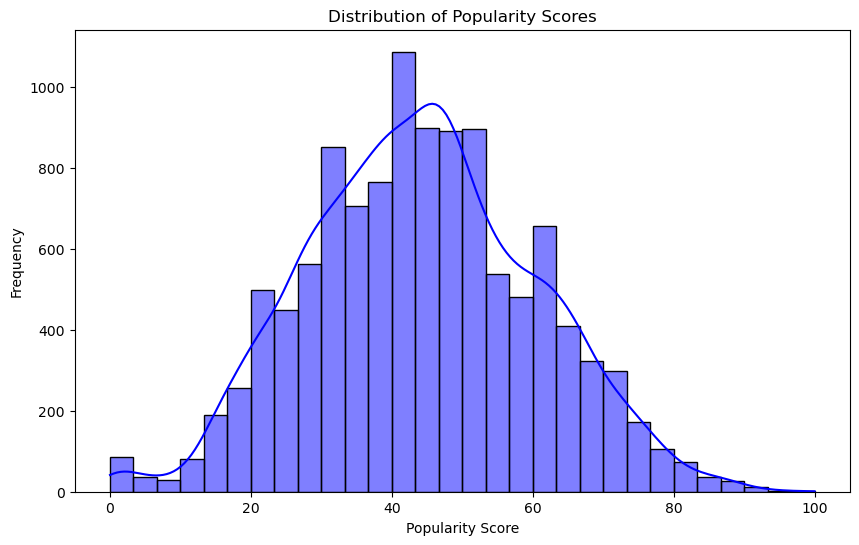

In [56]:
# Distribution of Popularity Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['Popularity_Score'], bins=30, kde=True, color='blue')
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()


# CORRELATION ANALYSIS AND DISTRIBUTION

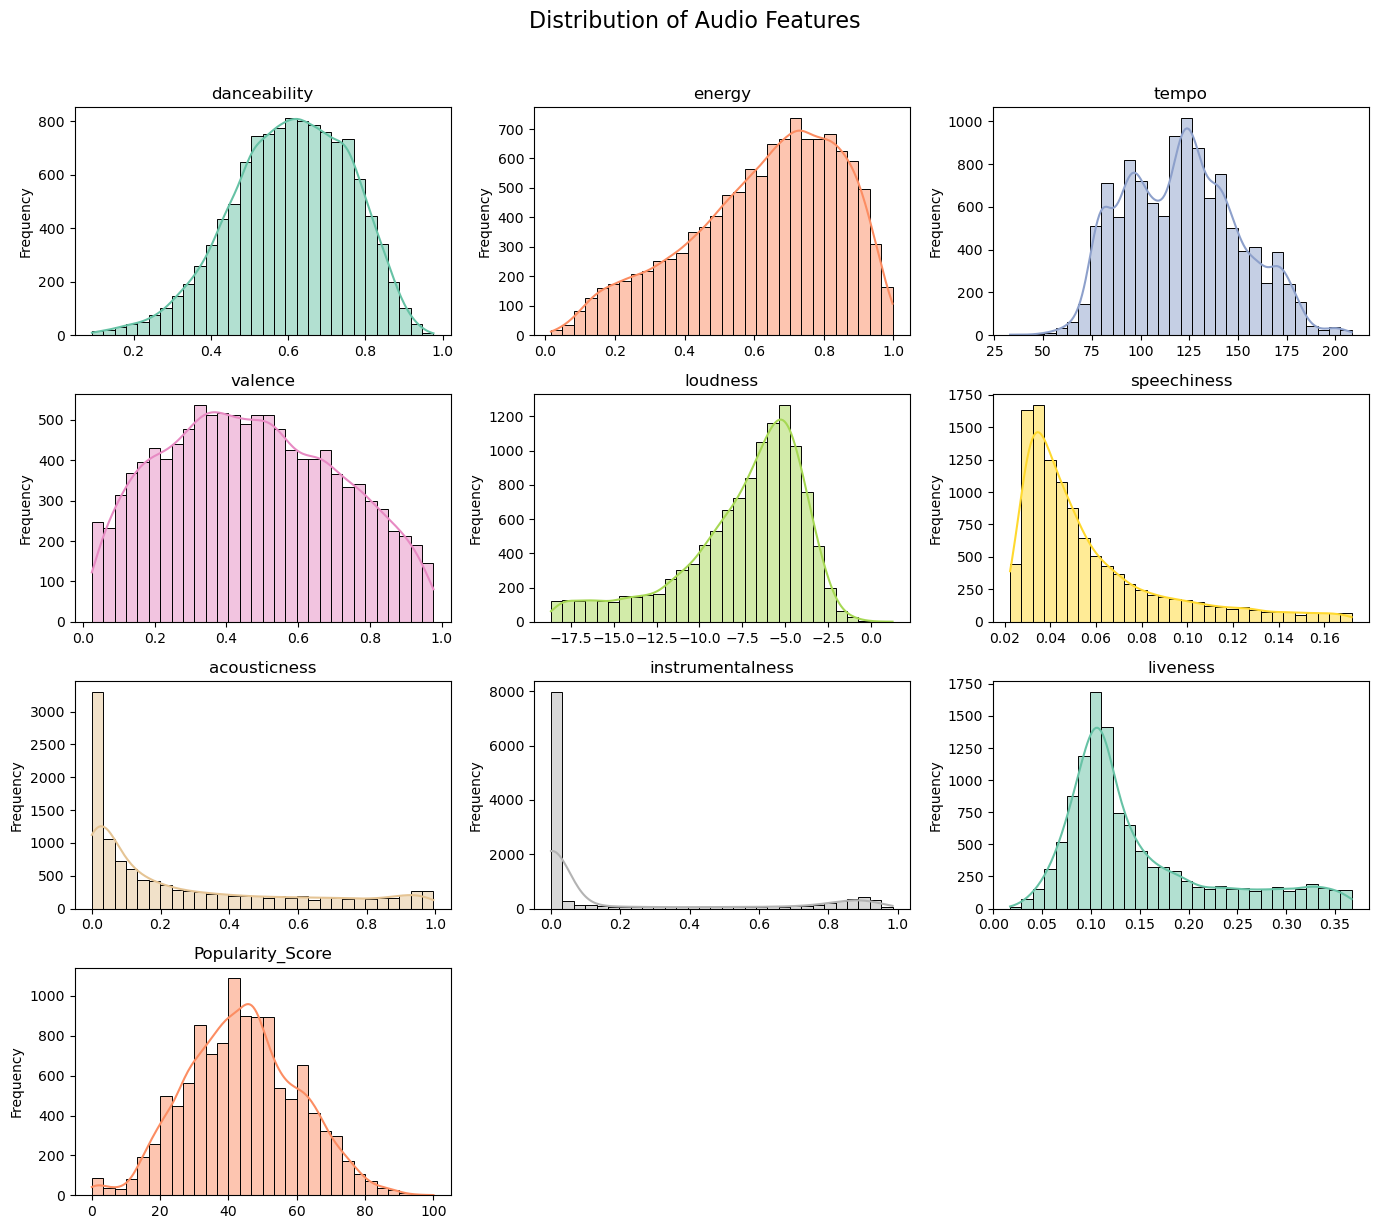

In [70]:
# Distribution of each feature,

# Define the list of audio features to plot
audio_features = ['danceability', 'energy', 'tempo', 'valence', 
                  'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'Popularity_Score']

# Set up the plot grid
plt.figure(figsize=(14, 12))
plt.suptitle('Distribution of Audio Features', fontsize=16, y=1.02)

# Generate a color palette with enough colors for all features
palette = sns.color_palette("Set2", len(audio_features))

# Loop through each feature and create a histogram
for i, feature in enumerate(audio_features):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns
    sns.histplot(df_no_outliers[feature], bins=30, kde=True, color=palette[i])
    plt.title(feature, fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


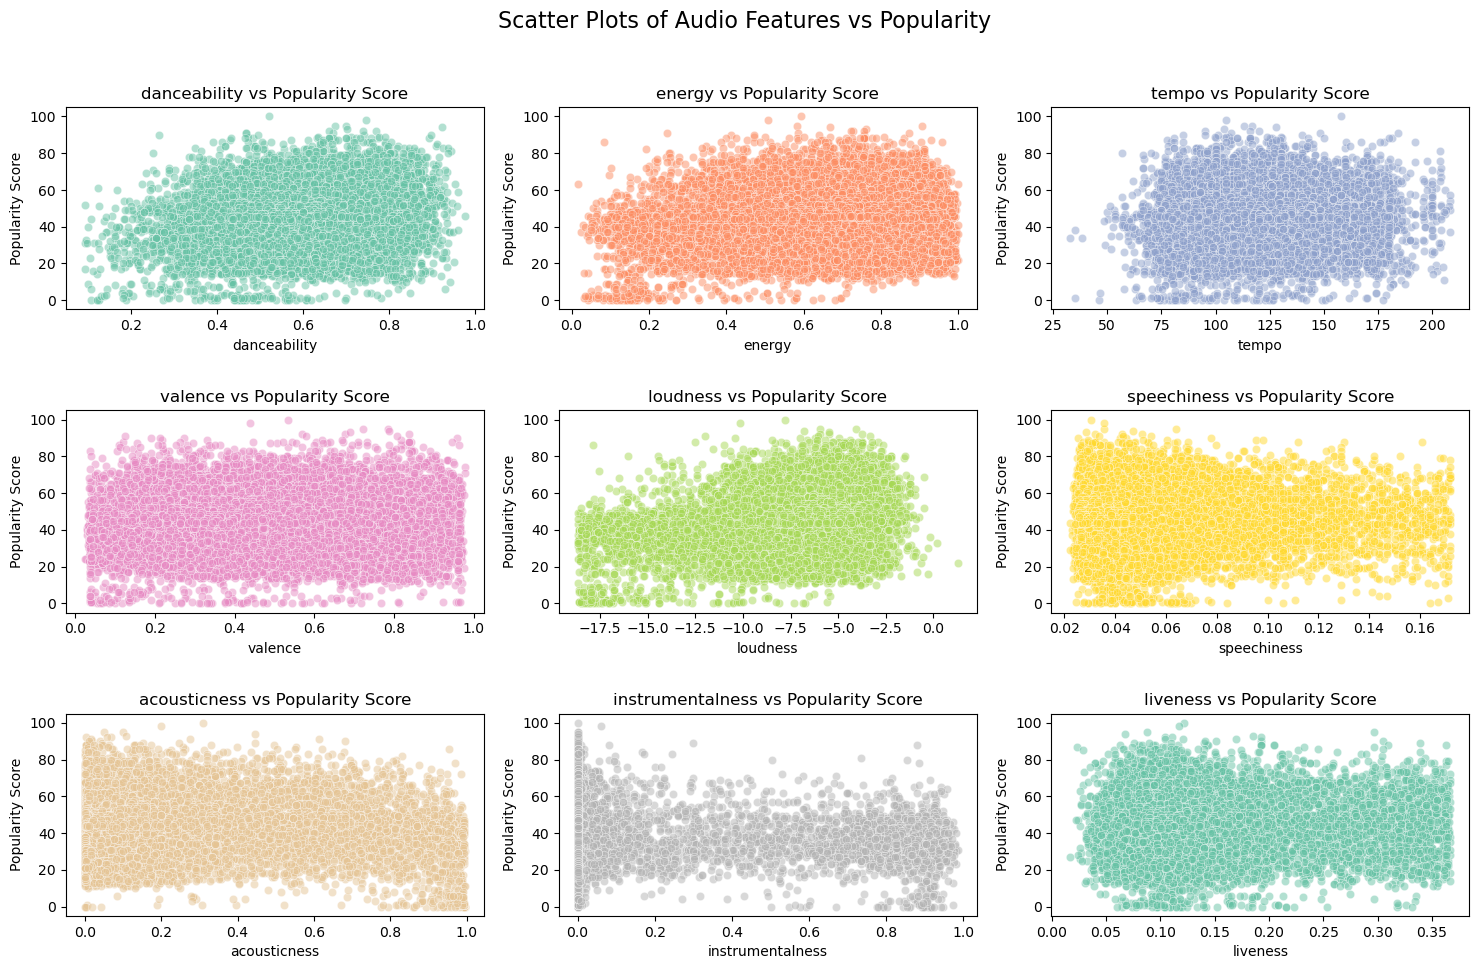

In [77]:
# Scatter plot between each feature and popularity

plt.figure(figsize=(15, 12))
plt.suptitle('Scatter Plots of Audio Features vs Popularity', fontsize=16, y=1.02)

# Loop through each feature
for i, feature in enumerate(audio_features):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns
    sns.scatterplot(data=df_no_outliers, x=feature, y='Popularity_Score', alpha=0.5, color=palette[i])
    plt.title(f"{feature} vs Popularity Score", fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Popularity Score')

# Adjust layout and show the plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


C:\Users\manis\AppData\Local\Temp\ipykernel_16268\4120172182.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_outliers.corr()


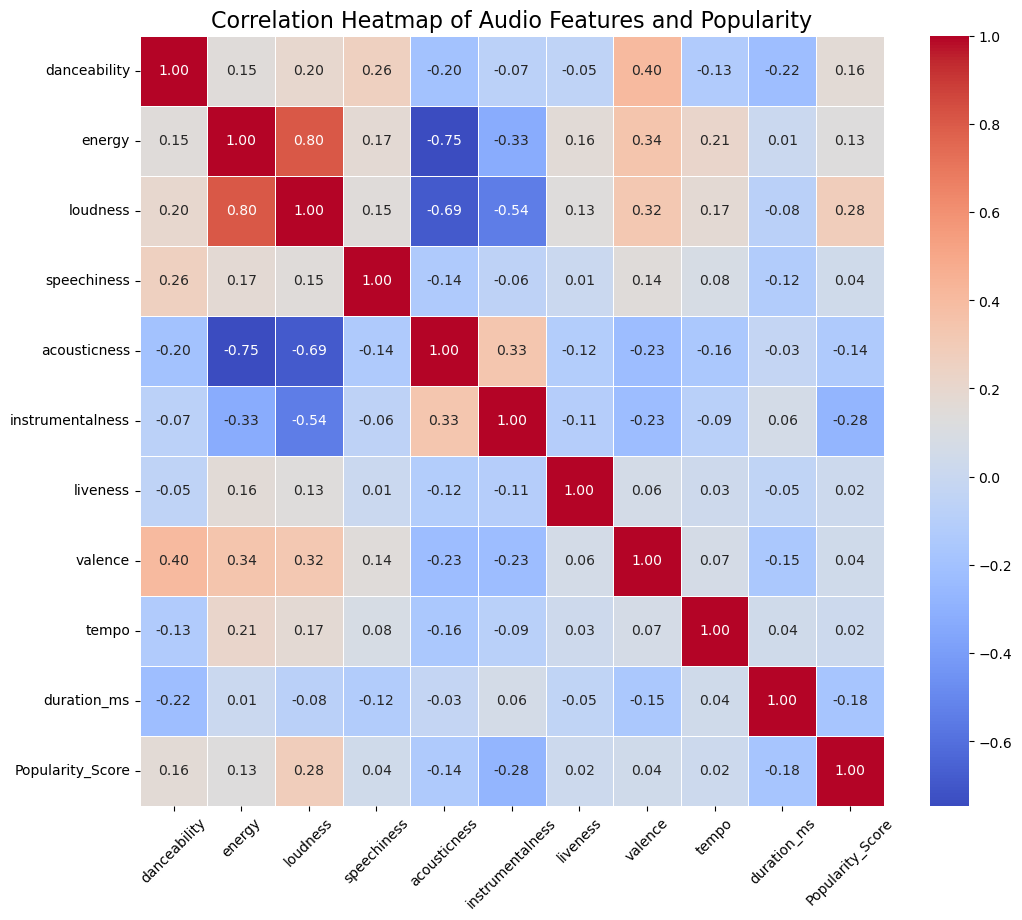

In [78]:

# Calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()

# Set up the figure
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Add titles and labels
plt.title("Correlation Heatmap of Audio Features and Popularity", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


# REGRESSION ANALYSIS

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
features = ['danceability', 'energy', 'tempo', 'valence', 
            'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness']
target = 'Popularity_Score'

# Define X (features) and y (target)
X = df_no_outliers[features]
y = df_no_outliers[target]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (9141, 9)
Testing set size: (2286, 9)


In [82]:
# Using Linear regression to fit the model
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Model Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Predict on the test set
y_pred = model.predict(X_test)


Model Coefficients:
danceability: 17.5601
energy: -10.2388
tempo: 0.0128
valence: -7.5311
loudness: 1.4425
speechiness: -6.4381
acousticness: 2.5308
instrumentalness: -8.9410
liveness: 0.2084
Intercept: 53.9252


In [83]:
# Error metrics

# Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Mean Squared Error (MSE): 222.8370
R-squared (R²): 0.1503


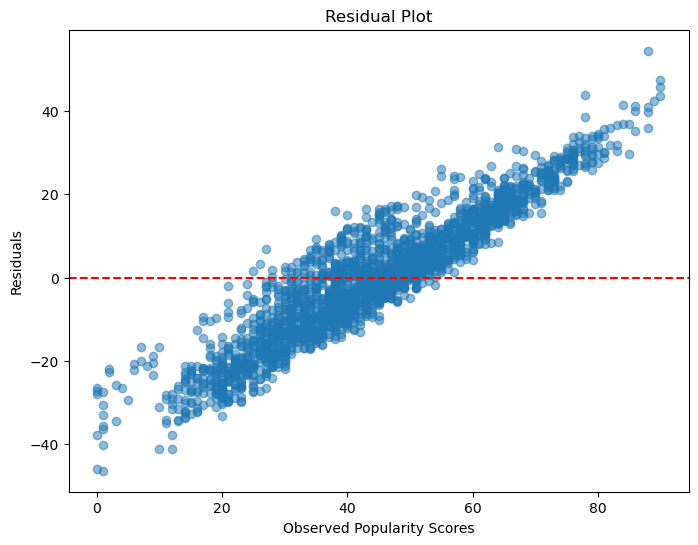

In [88]:
# Residual Analysis

# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Observed Popularity Scores")
plt.ylabel("Residuals")
plt.show()

In [80]:
import statsmodels.api as sm

# Independent variables (all audio features you mentioned)
X = df_no_outliers[['loudness', 'speechiness', 'danceability', 'energy', 'tempo', 
                    'valence', 'acousticness', 'instrumentalness', 'liveness']]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Dependent variable (target)
y = df_no_outliers['Popularity_Score']

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Display the model summary
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:       Popularity_Score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     206.2
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:39:25   Log-Likelihood:                -47201.
No. Observations:               11427   AIC:                         9.442e+04
Df Residuals:                   11417   BIC:                         9.450e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               55.3960      1.618  

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            Feature        VIF
0      danceability  17.216734
1            energy  18.016994
2             tempo  16.731958
3           valence   6.607414
4          loudness  11.579900
5       speechiness   4.571673
6      acousticness   3.899404
7  instrumentalness   1.885491
8          liveness   4.621830


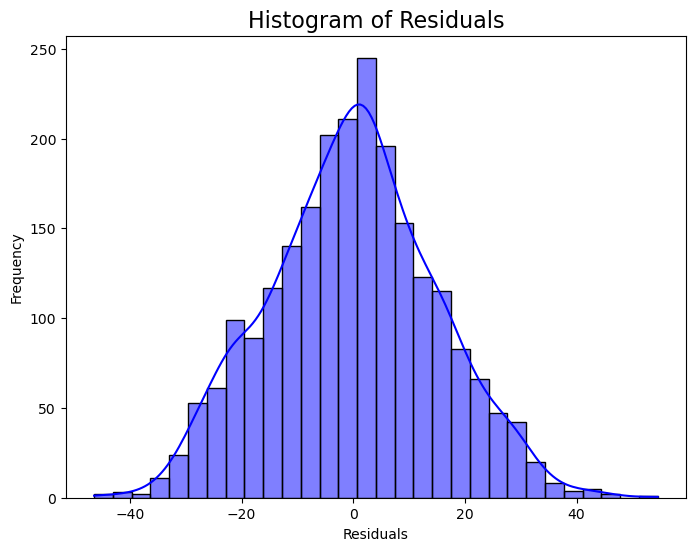

In [90]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title("Histogram of Residuals", fontsize=16)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


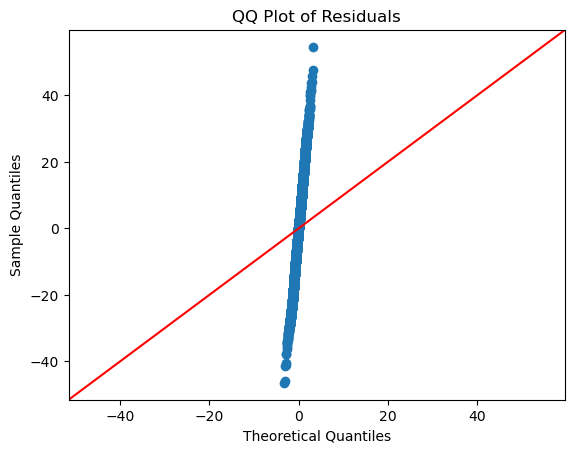

In [91]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()
